In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import curve_fit
from scipy.special import gamma
from scipy.stats import chi2

Bitte bei allen Pfaden "Your_Folder" durch ihren Gruppennamen ersetzten! Dann können die Daten direkt von dort eingelesen werden!

In [2]:
# Aufgabe 2

#Zaehlrohrspannung:
U=np.arange(460, 615, 25)
print(U)
dU=10#Ablesefehler der Spannung

#gezaehlte Ereignisse
N=np.array([1674, 1996, 2102, 2094, 2114, 2097, 2118])
assert(len(U) == len(N))
Fehler_N=np.sqrt(N)
print(Fehler_N)

[460 485 510 535 560 585 610]
[40.91454509 44.67661581 45.84757355 45.76024475 45.97825573 45.79301257
 46.021734  ]


Text(0.5, 1.0, 'Zählrohrcharakteristik')

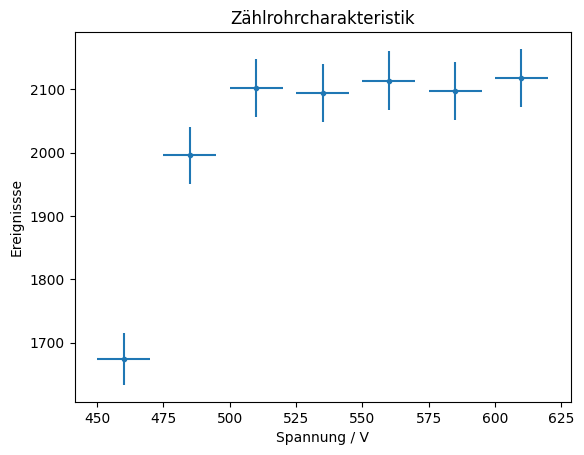

In [3]:
plt.errorbar(U, N, yerr=Fehler_N,xerr=dU, fmt=".")
plt.xlabel('Spannung / V')
plt.ylabel('Ereignissse')
plt.title('Zählrohrcharakteristik')

In [4]:
def linear(x,a,b):
    return a*x+b

popt, pcov = curve_fit(linear, U[2:], N[2:])

In [5]:
U0 = np.mean(U[[2,-1]])
U0

560.0

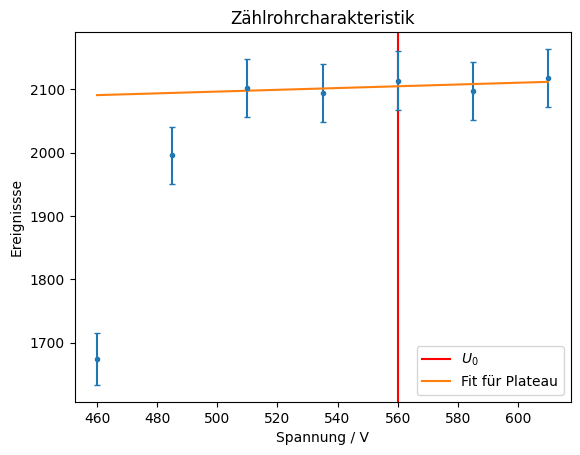

In [69]:
plt.axvline(x=U0, color="red", label="$U_0$")
plt.errorbar(U, N, Fehler_N, fmt=".",capsize=2)
plt.xlabel('Spannung / V')
plt.ylabel('Ereignissse')
plt.title('Zählrohrcharakteristik')
plt.plot(U[0:], linear(U[0:],*popt), label="Fit für Plateau")
plt.legend()
plt.savefig("E:\Versuch_251_252\Dokumente\Messungen\Mabert\BestimmungU0_Versuch251.pdf", format="pdf")

In [9]:
# Aufgabe 3
# U_0 = 560
N_1 = np.array([10566, 10730]) # U0 , U0 +100, t=1min
N_3 = np.array([31199, 31756]) # U0 , U0 +100, t=3min
err_N_1 = np.sqrt(N_1)
err_N_3 = np.sqrt(N_3)
A_1 = N_1[1]-N_1[0]
err_A_1 = np.sqrt(N_1[1]+N_1[0])
A_3 = N_3[1]-N_3[0]
err_A_3 = np.sqrt(N_3[1]+N_3[0])
print("1min: slope =", A_1 ,"+-", np.round(err_A_1))
print("3min: slope =", A_3 ,"+-", np.round(err_A_3))
print("sigma 1min: ", np.round(A_1/err_A_1,2))
print("sigma 3min: ", np.round(A_3/err_A_3,2))

1min: slope = 164 +- 146.0
3min: slope = 557 +- 251.0
sigma 1min:  1.12
sigma 3min:  2.22


In [20]:
print(f"Messung 1 Minute:\n3sigma-Bereich: [{-3 * err_A_1}, {3 * err_A_1}], {A_1} entspricht {A_1 / err_A_1} sigma => Nicht signifikant")
print(f"Messung 3 Minuten:\n3sigma-Bereich: [{-3 * err_A_3}, {3 * err_A_3}], {A_3} entspricht {A_3 / err_A_3} sigma => Nicht signifikant")

Messung 1 Minute:
3sigma-Bereich: [-437.7944723269128, 437.7944723269128], 164 entspricht 1.123815011608028 sigma => Nicht signifikant
Messung 3 Minuten:
3sigma-Bereich: [-752.7250494038311, 752.7250494038311], 557 entspricht 2.2199340932302647 sigma => Nicht signifikant


In [23]:
ratio_1 = (N_1[1]-N_1[0])/N_1[0]
err_ratio_1 = ratio_1 * np.sqrt( (err_N_1[0]/N_1[0])**2 + (err_A_1/A_1)**2)
ratio_3 = (N_3[1]-N_3[0])/N_3[0]
err_ratio_3 = ratio_3 * np.sqrt( (err_N_3[0]/N_3[0])**2 + (err_A_3/A_3)**2)
print("1min Anstieg =", np.round(ratio_1*100,2), "+-", np.round(err_ratio_1*100, 2),"%")
print("3min Anstieg =", np.round(ratio_3*100,2), "+-", np.round(err_ratio_3*100, 2),"%")

1min Anstieg = 1.55 +- 1.38 %
3min Anstieg = 1.79 +- 0.8 %


#### Aufgabe 4

In [70]:
# Aufgabe 4

anzahl, haeufigkeit=np.loadtxt("E:\Versuch_251_252\Dokumente\Messungen\Mabert\data_aufgabe2.txt", unpack=True,
                              delimiter = ",", skiprows = 4, usecols = (0,1) )
fehler=np.sqrt(haeufigkeit)

Text(0.5, 1.0, 'Statistik des radioaktiven Zerfalls')

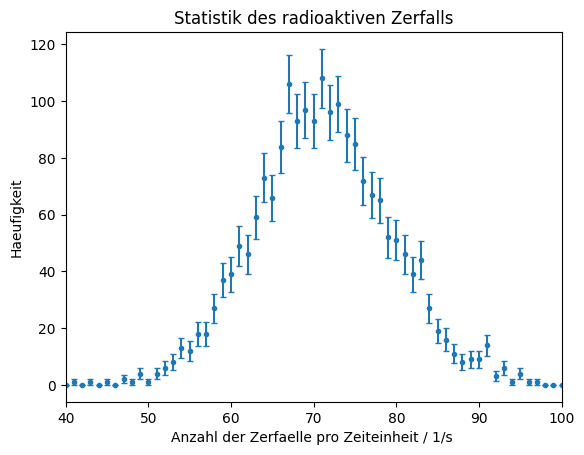

In [71]:
plt.errorbar(anzahl, haeufigkeit, fehler, fmt=".",capsize=2)
plt.xlim((40, 100))
plt.xlabel('Anzahl der Zerfaelle pro Zeiteinheit / 1/s ')
plt.ylabel('Haeufigkeit')
plt.title('Statistik des radioaktiven Zerfalls')

In [72]:
def gaussian(x, A, mu, sig): #A: Flaeche der Gaussfunktion
    return A/(np.sqrt(2 * np.pi)*sig)*np.exp(-(x-mu)**2 / (2 * sig**2))

In [74]:
zerf_gr10 = np.where(haeufigkeit > 10)
zerf_gr10_min = 21
zerf_gr10_max = 58

zerf_gr10

(array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
        38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
        58], dtype=int64),)

In [75]:
popt_g, pcov_g=curve_fit(gaussian, anzahl[zerf_gr10_min:zerf_gr10_max], haeufigkeit[zerf_gr10_min:zerf_gr10_max], p0 = [2000, 67.27, 8.46], sigma=fehler[zerf_gr10_min:zerf_gr10_max], absolute_sigma = True)
# print(pcov_g)

print(f"A = {popt_g[0]:.2f} +- {np.sqrt(pcov_g[0][0]):.2f}")
print(f"mu = {popt_g[1]:.2f} +- {np.sqrt(pcov_g[1][1]):.2f}")
print(f"sig = {popt_g[2]:.2f} +- {np.sqrt(pcov_g[2][2]):.2f}")

A = 1965.84 +- 45.20
mu = 70.86 +- 0.20
sig = 8.00 +- 0.17


In [76]:
print(fehler[zerf_gr10_min:zerf_gr10_max])

[ 3.60555128  3.46410162  4.24264069  4.24264069  5.19615242  6.08276253
  6.244998    7.          6.78232998  7.68114575  8.54400375  8.1240384
  9.16515139 10.29563014  9.64365076  9.8488578   9.64365076 10.39230485
  9.79795897  9.94987437  9.38083152  9.21954446  8.48528137  8.18535277
  8.06225775  7.21110255  7.14142843  6.78232998  6.244998    6.63324958
  5.19615242  4.35889894  4.          3.31662479  2.82842712  3.
  3.        ]


In [77]:
def poisson(x, A_p, mu_p):
    return A_p*np.exp(-mu_p)*mu_p**x/gamma(x+1)

popt_p, pcov_p = curve_fit(poisson, anzahl[zerf_gr10_min:zerf_gr10_max], haeufigkeit[zerf_gr10_min:zerf_gr10_max], p0=[2000, 67.27], sigma = fehler[zerf_gr10_min:zerf_gr10_max], absolute_sigma=True)
#print(pcov_g)

print(f"A = {popt_p[0]:.2f} +- {np.sqrt(pcov_p[0][0]):.2f}")
print(f"mu = {popt_p[1]:.2f} +- {np.sqrt(pcov_p[1][1]):.2f}")

A = 1972.29 +- 45.05
mu = 70.96 +- 0.20


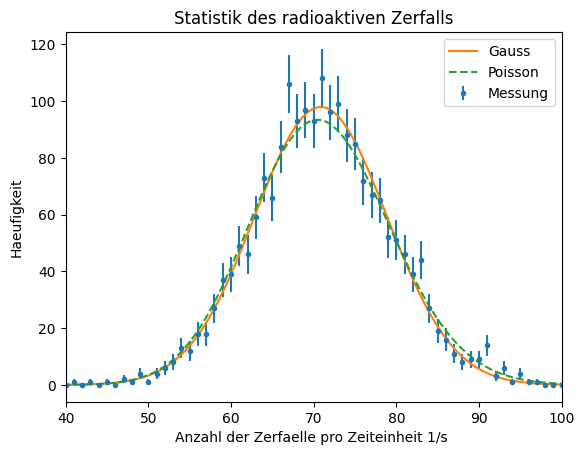

In [78]:
plt.errorbar(anzahl,haeufigkeit,fehler, fmt=".",label='Messung')
plt.xlabel('Anzahl der Zerfaelle pro Zeiteinheit 1/s ')
plt.ylabel('Haeufigkeit')
plt.title('Statistik des radioaktiven Zerfalls')
x=np.linspace(min(anzahl), max(anzahl), int(max(anzahl)))

plt.plot(x, gaussian(x,*popt_g), label='Gauss')
plt.plot(x, poisson(x,*popt_p), label='Poisson',linestyle='dashed')
plt.legend()
plt.xlim((40, 100))
# plt.yscale('log')
plt.savefig("E:\Versuch_251_252\Dokumente\Messungen\Mabert\Gauss-Poisson-Verteilung.pdf", format="pdf")

In [80]:
print("Gaussfit:")
print("A=", popt_g[0], ", Standardfehler=", np.sqrt(pcov_g[0][0]))
print("mu=", popt_g[1], ", Standardfehler=", np.sqrt(pcov_g[1][1]))
print("sig=", popt_g[2], ", Standardfehler=", np.sqrt(pcov_g[2][2]))
print("Poissonfit:")
print("A=", popt_p[0], ", Standardfehler=", np.sqrt(pcov_p[0][0]))
print("mu=", popt_p[1], ", Standardfehler=", np.sqrt(pcov_p[1][1]))

Gaussfit:
A= 1965.8373182749951 , Standardfehler= 45.2020279922623
mu= 70.85823451162256 , Standardfehler= 0.19655796374789292
sig= 8.004790751547462 , Standardfehler= 0.17160408030716875
Poissonfit:
A= 1972.288277304002 , Standardfehler= 45.05408004774292
mu= 70.96488666812209 , Standardfehler= 0.2028777518368864


In [81]:
#Gauss:
x1 = ((gaussian(anzahl[zerf_gr10_min:zerf_gr10_max],*popt_g)-haeufigkeit[zerf_gr10_min:zerf_gr10_max])**2)
x2 = fehler[zerf_gr10_min:zerf_gr10_max]**2
chi2_div = x1/x2
chi2_g= np.sum(chi2_div)
dof_g=len(anzahl[zerf_gr10_min:zerf_gr10_max])-3 #dof:degrees of freedom, Freiheitsgrad
chi2_red_g=chi2_g/dof_g
print("chi2_g=", chi2_g)
print("chi2_red_g=",chi2_red_g)

chi2_g= 18.49944005336511
chi2_red_g= 0.5441011780401502


In [82]:
#Poisson:
x11 = (poisson(anzahl[zerf_gr10_min:zerf_gr10_max],*popt_p)-haeufigkeit[zerf_gr10_min:zerf_gr10_max])**2
x22 = fehler[zerf_gr10_min:zerf_gr10_max]**2
chi2_div = x11/x22
chi2_p = np.sum(chi2_div)
dof_p = len(anzahl[zerf_gr10_min:zerf_gr10_max])-2 #poisson hat nur 2 Parameter
chi2_red_p=chi2_p/dof_p
print("chi2_p=", chi2_p)
print("chi2_red_p=",chi2_red_p)

chi2_p= 24.617953649242224
chi2_red_p= 0.7033701042640635


In [83]:
prob_g = round(1-chi2.cdf(chi2_g, dof_g), 2)*100
prob_p = round(1-chi2.cdf(chi2_p, dof_p), 2)*100
print("Wahrscheinlichkeit Gauss=", prob_g, "%")
print("Wahrscheinlichkeit Poisson=", prob_p, "%")

Wahrscheinlichkeit Gauss= 99.0 %
Wahrscheinlichkeit Poisson= 90.0 %


In [88]:
# Aufgabe 5

anzahl, haeufigkeit=np.loadtxt("E:\Versuch_251_252\Dokumente\Messungen\Mabert\data_aufgabe3.txt", unpack=True,
                              delimiter = ",", skiprows = 4, usecols = (0,1) )
fehler=np.sqrt(haeufigkeit)

Text(0.5, 1.0, 'Statistik des radioaktiven Zerfalls')

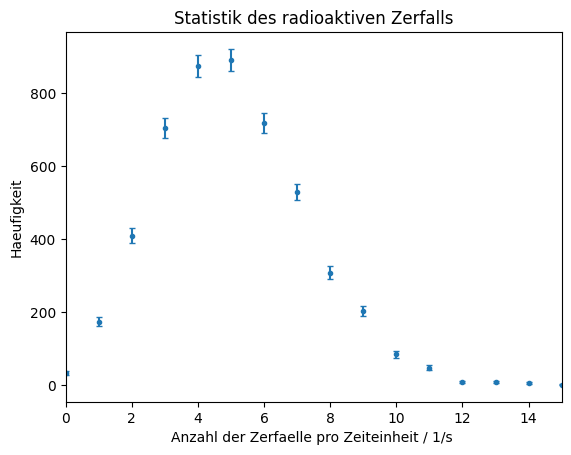

In [89]:
plt.errorbar(anzahl, haeufigkeit, fehler, fmt=".",capsize=2)
plt.xlim((0, 15))

plt.xlabel('Anzahl der Zerfaelle pro Zeiteinheit / 1/s ')
plt.ylabel('Haeufigkeit')
plt.title('Statistik des radioaktiven Zerfalls')

In [90]:
zerf_5_gr10 = np.where(haeufigkeit > 10)
zerf_5_gr10_min = 0
zerf_5_gr10_max = 11

In [102]:
popt_g, pcov_g=curve_fit(gaussian, anzahl[zerf_5_gr10_min:zerf_5_gr10_max], haeufigkeit[zerf_5_gr10_min:zerf_5_gr10_max], p0 = [5000, 4.48, 2.09], sigma=fehler[zerf_5_gr10_min:zerf_5_gr10_max], absolute_sigma = True)
print(pcov_g)

[[4.94368317e+03 1.58112059e-02 1.04575232e-01]
 [1.58112059e-02 1.04432272e-03 1.34662944e-04]
 [1.04575232e-01 1.34662944e-04 6.34665068e-04]]


In [103]:
print(fehler[zerf_5_gr10_min:zerf_5_gr10_max])

[ 5.65685425 13.19090596 20.22374842 26.55183609 29.58039892 29.86636905
 26.79552201 23.         17.54992877 14.24780685  9.16515139]


In [104]:
def poisson(x, A_p, mu_p):
    return A_p*np.exp(-mu_p)*mu_p**x/gamma(x+1)

popt_p, pcov_p = curve_fit(poisson, anzahl[zerf_5_gr10_min:zerf_5_gr10_max], haeufigkeit[zerf_5_gr10_min:zerf_5_gr10_max], p0=[5000, 4.48], sigma = fehler[zerf_5_gr10_min:zerf_5_gr10_max], absolute_sigma=True)
print(pcov_g)

[[4.94368317e+03 1.58112059e-02 1.04575232e-01]
 [1.58112059e-02 1.04432272e-03 1.34662944e-04]
 [1.04575232e-01 1.34662944e-04 6.34665068e-04]]


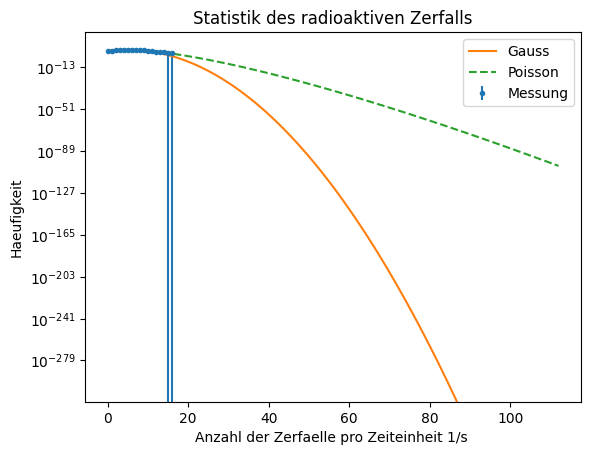

In [105]:
fig = plt.figure()
plt.errorbar(anzahl,haeufigkeit,fehler, fmt=".",label='Messung')
plt.xlabel('Anzahl der Zerfaelle pro Zeiteinheit 1/s ')
plt.ylabel('Haeufigkeit')
plt.title('Statistik des radioaktiven Zerfalls')
x=np.linspace(min(anzahl), max(anzahl), int(max(anzahl)))

plt.plot(x, gaussian(x,*popt_g), label='Gauss')
plt.plot(x, poisson(x,*popt_p), label='Poisson',linestyle='dashed')
plt.legend()

plt.yscale('log')

# plt.semilogy()
#plt.xlim((0,15))
#plt.ylim((0,1000))
plt.savefig("E:\Versuch_251_252\Dokumente\Messungen\Mabert\Gauss-Poisson-Verteilung_Aufgabe5.pdf", format="pdf")

In [106]:
print("Gaussfit:")
print("A=", popt_g[0], ", Standardfehler=", np.sqrt(pcov_g[0][0]))
print("mu=", popt_g[1], ", Standardfehler=", np.sqrt(pcov_g[1][1]))
print("sig=", popt_g[2], ", Standardfehler=", np.sqrt(pcov_g[2][2]))
print("Poissonfit:")
print("A=", popt_p[0], ", Standardfehler=", np.sqrt(pcov_p[0][0]))
print("mu=", popt_p[1], ", Standardfehler=", np.sqrt(pcov_p[1][1]))

Gaussfit:
A= 4880.366071577377 , Standardfehler= 70.31133031847548
mu= 4.919131287514691 , Standardfehler= 0.03231598245622103
sig= 2.1340540875557004 , Standardfehler= 0.025192559773195854
Poissonfit:
A= 4992.297029756993 , Standardfehler= 71.21313085053008
mu= 5.000742745075248 , Standardfehler= 0.03377435068530828


In [107]:
#Gauss:
x1 = ((gaussian(anzahl[zerf_5_gr10_min:zerf_5_gr10_max],*popt_g)-haeufigkeit[zerf_5_gr10_min:zerf_5_gr10_max])**2)
x2 = fehler[zerf_5_gr10_min:zerf_5_gr10_max]**2
chi2_div = x1/x2
chi2_g= np.sum(chi2_div)
dof_g=len(anzahl[zerf_5_gr10_min:zerf_5_gr10_max])-3 #dof:degrees of freedom, Freiheitsgrad
chi2_red_g=chi2_g/dof_g
print("chi2_g=", chi2_g)
print("chi2_red_g=",chi2_red_g)

chi2_g= 94.25083763269866
chi2_red_g= 11.781354704087333


In [108]:
#Poisson:
x11 = (poisson(anzahl[zerf_5_gr10_min:zerf_5_gr10_max],*popt_p)-haeufigkeit[zerf_5_gr10_min:zerf_5_gr10_max])**2
x22 = fehler[zerf_5_gr10_min:zerf_5_gr10_max]**2
chi2_div = x11/x22
chi2_p = np.sum(chi2_div)
dof_p = len(anzahl[zerf_5_gr10_min:zerf_5_gr10_max])-2 #poisson hat nur 2 Parameter
chi2_red_p=chi2_p/dof_p
print("chi2_p=", chi2_p)
print("chi2_red_p=",chi2_red_p)

chi2_p= 5.141080127786678
chi2_red_p= 0.5712311253096308


In [109]:
prob_g = round(1-chi2.cdf(chi2_g, dof_g), 2)*100
prob_p = round(1-chi2.cdf(chi2_p, dof_p), 2)*100
print("Wahrscheinlichkeit Gauss=", prob_g, "%")
print("Wahrscheinlichkeit Poisson=", prob_p, "%")

Wahrscheinlichkeit Gauss= 0.0 %
Wahrscheinlichkeit Poisson= 82.0 %
